In [1]:

   import pandas as pd
   import numpy as np
   import matplotlib.pyplot as plt

   # Configurando a seed para reprodutibilidade
   np.random.seed(42)

   # Gerando dados falsos
   categorias = ['Eletrônicos', 'Roupas', 'Alimentos', 'Livros', 'Brinquedos']
   datas = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
   num_registros = len(datas)

   # Criando DataFrame
   data = {
       'Data': np.random.choice(datas, num_registros),
       'Categoria': np.random.choice(categorias, num_registros),
       'Quantidade_Vendida': np.random.randint(1, 100, num_registros),
       'Preco_Unitario': np.round(np.random.uniform(10, 500, num_registros), 2)
   }
   df = pd.DataFrame(data)
   df['Valor_Total'] = df['Quantidade_Vendida'] * df['Preco_Unitario']

   # Salvando o DataFrame em um arquivo CSV
   df.to_csv('dados_vendas.csv', index=False)

   print("Conjunto de dados gerado e salvo como 'dados_vendas.csv'.")

Conjunto de dados gerado e salvo como 'dados_vendas.csv'.


Quantas linhas e colunas existem no DataFrame carregado?


In [2]:
df.shape

(365, 5)

Quais são os tipos de dados (dtypes) das colunas?

In [3]:
df.dtypes

Data                  datetime64[ns]
Categoria                     object
Quantidade_Vendida             int32
Preco_Unitario               float64
Valor_Total                  float64
dtype: object

Exibir as primeiras 5 linhas do DataFrame:


In [4]:
df.head()

,Data,Categoria,Quantidade_Vendida,Preco_Unitario,Valor_Total
0,2023-04-13,Roupas,74,60.43,4471.82
1,2023-12-15,Alimentos,83,272.88,22649.04
2,2023-09-28,Roupas,17,195.62,3325.54
3,2023-04-17,Roupas,85,233.93,19884.05
4,2023-03-13,Roupas,78,305.94,23863.32


Quantas categorias únicas de produtos estão presentes no DataFrame?

In [5]:
valor_unico = np.unique(df["Categoria"])
valor_unico

array(['Alimentos', 'Brinquedos', 'Eletrônicos', 'Livros', 'Roupas'],
      dtype=object)

Filtrar os dados para mostrar apenas as vendas da categoria 'Eletrônicos'

In [6]:
eletronicos = df[df['Categoria'] == 'Eletrônicos']
print(eletronicos)

          Data    Categoria  Quantidade_Vendida  Preco_Unitario  Valor_Total
5   2023-07-08  Eletrônicos                  73          256.12     18696.76
6   2023-01-21  Eletrônicos                   1          274.53       274.53
7   2023-04-13  Eletrônicos                  51          248.32     12664.32
14  2023-06-01  Eletrônicos                  34          303.52     10319.68
18  2023-09-15  Eletrônicos                  39          121.40      4734.60
..         ...          ...                 ...             ...          ...
347 2023-09-10  Eletrônicos                  33          431.46     14238.18
349 2023-09-13  Eletrônicos                  27          201.67      5445.09
351 2023-05-08  Eletrônicos                  29          243.57      7063.53
353 2023-10-08  Eletrônicos                  57          427.57     24371.49
356 2023-02-27  Eletrônicos                  55          466.48     25656.40

[73 rows x 5 columns]


**Filtrar as vendas acima de R$ 1000:**

In [7]:
vendas_acima_1000 = df[df['Valor_Total'] > 1000]
print(vendas_acima_1000)

          Data   Categoria  Quantidade_Vendida  Preco_Unitario  Valor_Total
0   2023-04-13      Roupas                  74           60.43      4471.82
1   2023-12-15   Alimentos                  83          272.88     22649.04
2   2023-09-28      Roupas                  17          195.62      3325.54
3   2023-04-17      Roupas                  85          233.93     19884.05
4   2023-03-13      Roupas                  78          305.94     23863.32
..         ...         ...                 ...             ...          ...
358 2023-12-26  Brinquedos                  68          147.88     10055.84
359 2023-06-23   Alimentos                  86          133.80     11506.80
361 2023-04-24  Brinquedos                  10          350.90      3509.00
363 2023-12-08  Brinquedos                  74          270.98     20052.52
364 2023-05-31      Roupas                  97          481.44     46699.68

[330 rows x 5 columns]


Pergunta 5: Quantas vendas acima de R$ 1000 ocorreram?


In [8]:
quantas_vendas_acima_1000 = df[df['Valor_Total'] > 1000].__len__
quantas_vendas_acima_1000


<bound method DataFrame.__len__ of           Data   Categoria  Quantidade_Vendida  Preco_Unitario  Valor_Total
0   2023-04-13      Roupas                  74           60.43      4471.82
1   2023-12-15   Alimentos                  83          272.88     22649.04
2   2023-09-28      Roupas                  17          195.62      3325.54
3   2023-04-17      Roupas                  85          233.93     19884.05
4   2023-03-13      Roupas                  78          305.94     23863.32
..         ...         ...                 ...             ...          ...
358 2023-12-26  Brinquedos                  68          147.88     10055.84
359 2023-06-23   Alimentos                  86          133.80     11506.80
361 2023-04-24  Brinquedos                  10          350.90      3509.00
363 2023-12-08  Brinquedos                  74          270.98     20052.52
364 2023-05-31      Roupas                  97          481.44     46699.68

[330 rows x 5 columns]>

In [9]:
quantas_vendas_acima_1000 = df[df['Valor_Total'] > 1000].shape
quantas_vendas_acima_1000


(330, 5)

Agrupar os dados por categoria e calcular o total de vendas por categoria

In [10]:
total_por_categoria = df.groupby('Categoria')['Valor_Total'].sum().reset_index()
print(total_por_categoria)

     Categoria  Valor_Total
0    Alimentos    742457.74
1   Brinquedos   1187964.04
2  Eletrônicos    897261.71
3       Livros    963685.46
4       Roupas    991215.29


Calcular a quantidade média vendida por categoria

In [11]:
media_quantidade_categoria = df.groupby('Categoria')['Quantidade_Vendida'].mean().reset_index
print(media_quantidade_categoria)

<bound method Series.reset_index of Categoria
Alimentos      55.618182
Brinquedos     47.247191
Eletrônicos    46.780822
Livros         50.917808
Roupas         47.200000
Name: Quantidade_Vendida, dtype: float64>


Qual categoria teve a maior quantidade média vendida

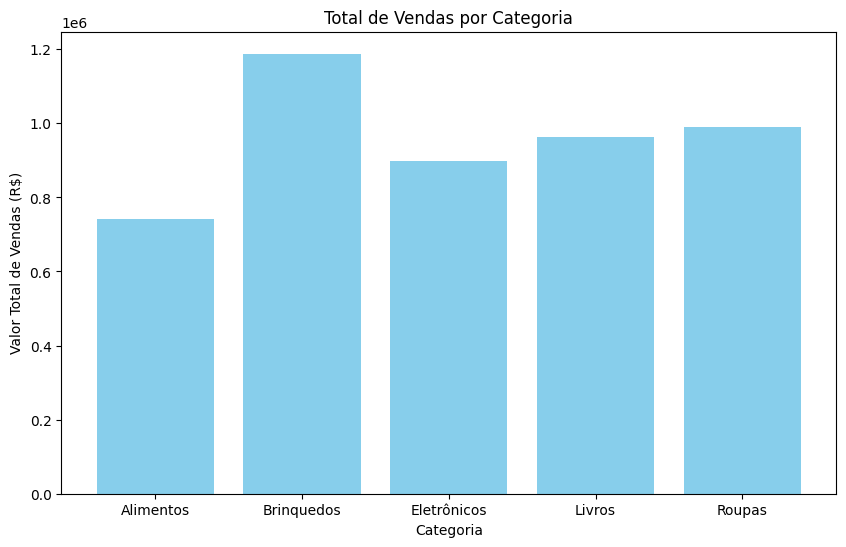

In [12]:
plt.figure(figsize=(10, 6))
plt.bar(total_por_categoria['Categoria'], total_por_categoria['Valor_Total'], color='skyblue')
plt.xlabel('Categoria')
plt.ylabel('Valor Total de Vendas (R$)')
plt.title('Total de Vendas por Categoria')
plt.show()

R: A categoria brinquedo teve a maior quantidade de vendas

Com base no gráfico, qual categoria visualmente se destaca em termos de vendas totais

R: Categoria Brinquedo

 **Criar um gráfico de linha mostrando a variação diária das vendas de 'Eletrônicos':**

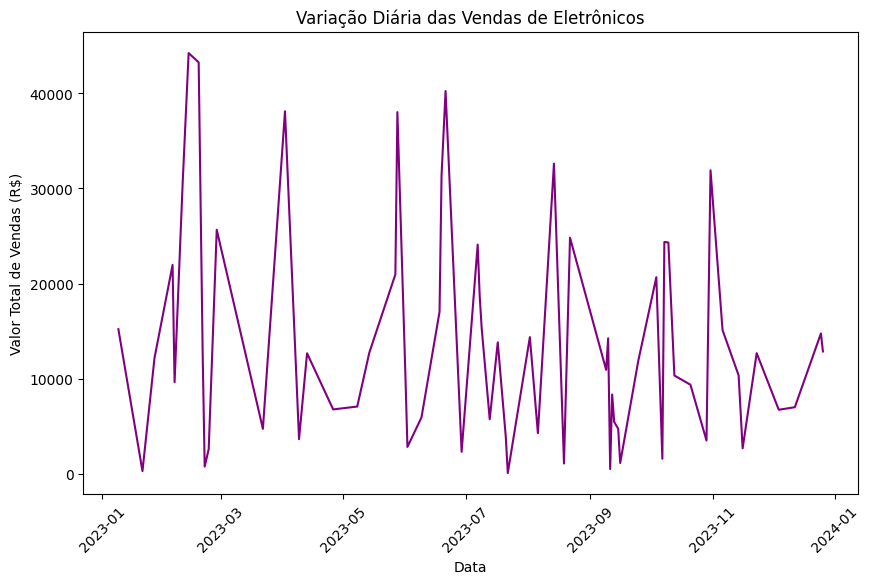

In [13]:
vendas_diarias = eletronicos.groupby('Data')['Valor_Total'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(vendas_diarias['Data'], vendas_diarias['Valor_Total'], color='purple')
plt.xlabel('Data')
plt.ylabel('Valor Total de Vendas (R$)')
plt.title('Variação Diária das Vendas de Eletrônicos')
plt.xticks(rotation=45)
plt.show()

Existe algum padrão ou tendência observável nas vendas diárias de eletrônicos?